In [53]:
import numpy as np # linear algebra
import pandas as pd 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [55]:
df=pd.read_csv("D:/Uni/7th_sem/NLP/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [56]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [57]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [58]:
df.shape

(17538, 2)

In [17]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


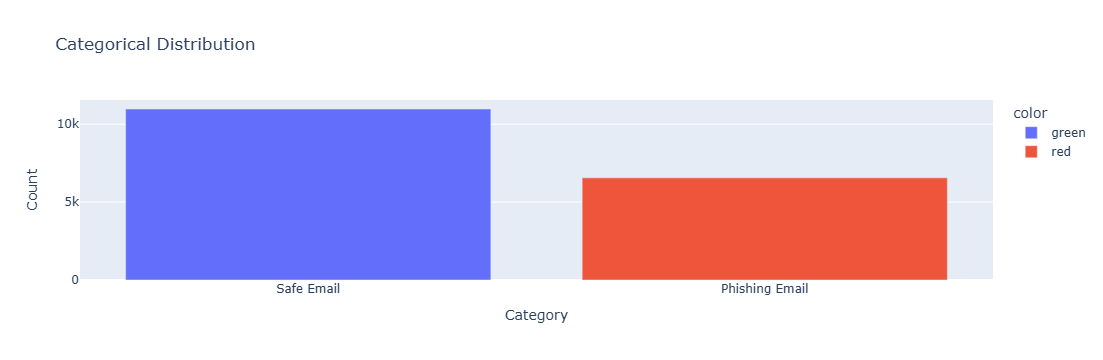

In [62]:
import plotly.express as px
# Create the bar chart
fig = px.bar(df['Email Type'].value_counts(), x=df['Email Type'].value_counts().index, y=df['Email Type'].value_counts().values,
             color=['blue', 'red'], labels={'x': 'Category', 'y': 'Count'},
             title="Categorical Distribution")

# Show the plot
fig.show()

In [65]:
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [66]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [67]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


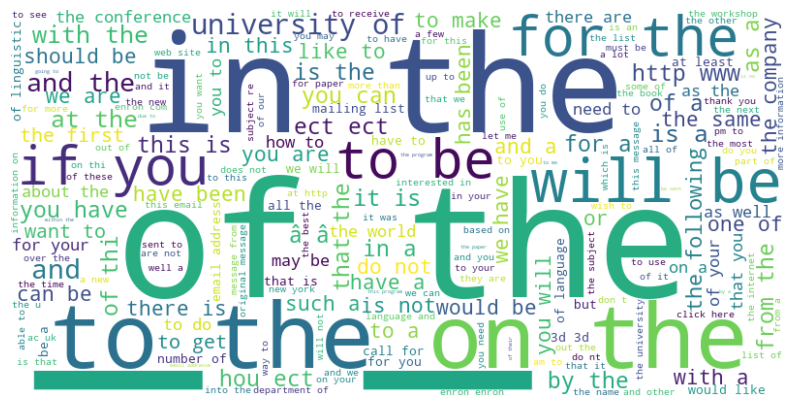

In [68]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

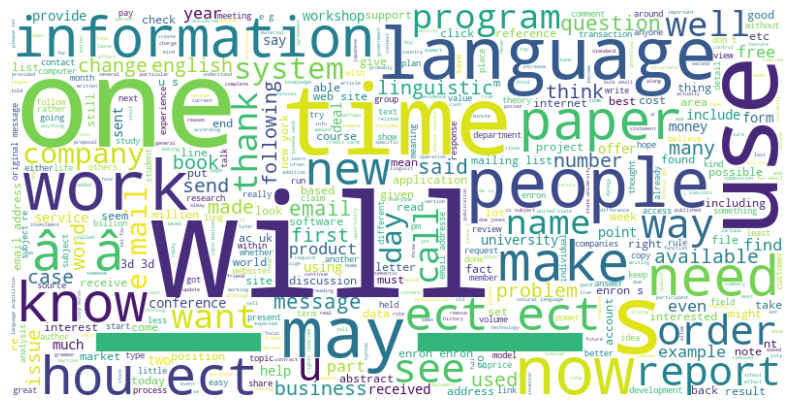

In [69]:
#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
tf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [71]:
y_tf = np.array(df['Email Type']) # convert the label into numpy array

In [73]:
x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,test_size=0.2,random_state=0)

In [78]:
rnf = RandomForestClassifier() #passing object
rnf.fit(x_train,y_train)

#prediction
pred_rnf = rnf.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

        Safe       0.97      0.97      0.97      1351
    Phishing       0.98      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



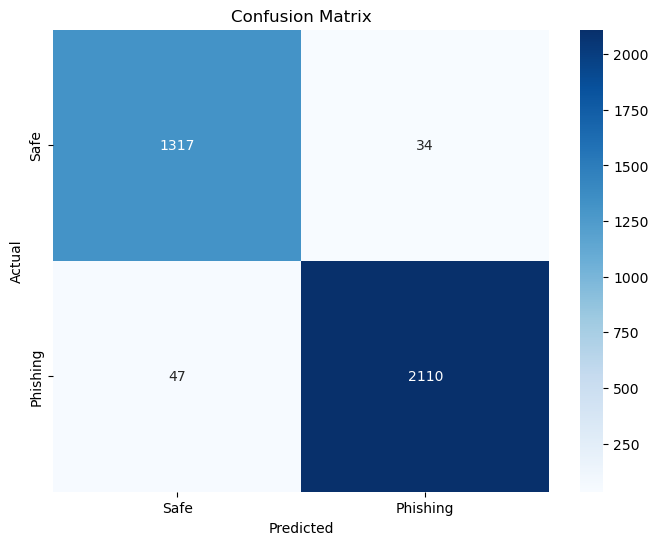

In [80]:
#performance
print("Classification Report:")
print(classification_report(y_test, pred_rnf, target_names=classes))

cm = confusion_matrix(y_test, pred_rnf)
classes = ['Safe', 'Phishing'] 

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
#accuracy_score
accuracy_score(y_test,pred_rnf)

0.9769099201824402

In [84]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()  # passing object
mlp.fit(x_train,y_train)

#prediction
pred_mlp = mlp.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

        Safe       0.98      0.98      0.98      1351
    Phishing       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



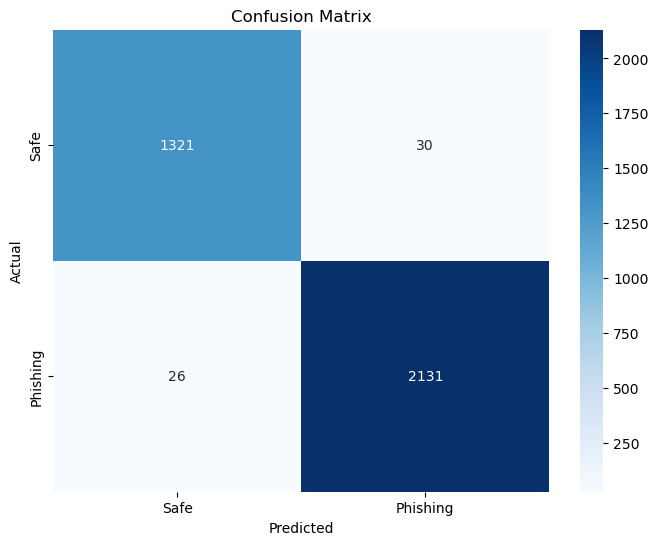

In [85]:
#performance
print("Classification Report:")
print(classification_report(y_test, pred_mlp, target_names=classes))

cm = confusion_matrix(y_test, pred_mlp)
classes = ['Safe', 'Phishing'] 

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [86]:
#accuracy_score
accuracy_score(y_test,pred_mlp)

0.984036488027366

In [87]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM
from keras.layers import Dense,Dropout
model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

C:\Users\mzain\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [88]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
  3/877 ━━━━━━━━━━━━━━━━━━━━ 3:15:38 13s/step - accuracy: 0.4583 - loss: 0.6938

KeyboardInterrupt: 

In [47]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
max_len = 150
tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [233]:
import joblib
# Save the trained pipeline to a .pkl file
joblib.dump(classifier, 'D:/Uni/7th_sem/NLP/models/email_detection_model.pkl')

print("Model saved successfully.")

Model saved successfully.


In [274]:
import re
import nltk
import imaplib
import email
from email.header import decode_header
from datetime import datetime
import joblib
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Load the pre-trained model
model_path = 'D:/Uni/7th_sem/NLP/models/email_detection_model.pkl'
classifier = joblib.load(model_path)

# Ensure stopwords are downloaded only once
def remove_stopwords(body):
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')  # Download if not found
    
    stop_words = set(stopwords.words('english'))
    words = body.split()
    
    # Convert words to lowercase and remove stopwords
    words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 2]  # Filter out very short words
    return " ".join(words)

# Function to clean HTML tags and normalize symbols (with lowercase conversion)
def clean_html_body(body):
    soup = BeautifulSoup(body, "html.parser")
    text = soup.get_text()
    
    # Normalize text but keep some symbols that might be useful
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Convert to lowercase and strip leading/trailing spaces
    
    return text

# Function to preprocess email body (clean and remove stopwords)
def preprocess_email_body(body):
    # Clean the HTML and normalize symbols
    clean_body = clean_html_body(body)
    
    # Remove stopwords to enhance classification
    processed_body = remove_stopwords(clean_body)
    
    return processed_body

# Function to classify the email
def classify_email(email_text):
    prediction = classifier.predict([email_text])  # Classify the email
    if prediction == "Phishing Email":
        return "Phishing Email"
    else:
        return "Safe Email"

# Function to check and fetch emails from Gmail
def fetch_emails_from_gmail(email_user, email_password):
    try:
        # Connect to the Gmail IMAP server
        mail = imaplib.IMAP4_SSL("imap.gmail.com")
        mail.login(email_user, email_password)
        
        # Select the mailbox you want to check (e.g., INBOX)
        mail.select('"[Gmail]/All Mail"')
        
        # Search for all emails (use "ALL" to get all emails)
        status, messages = mail.search(None, "ALL")
        
        # Get the list of email IDs
        email_ids = messages[0].split()
        today = datetime.today().strftime('%d-%b-%Y')  # Today's date in the format '03-Dec-2024'
        
        email_ids = email_ids[::-1]
        for email_id in email_ids:
            # Fetch the email by ID
            status, msg_data = mail.fetch(email_id, "(RFC822)")
            
            # Parse the email content
            for response_part in msg_data:
                if isinstance(response_part, tuple):
                    msg = email.message_from_bytes(response_part[1])
                    
                    # Decode the subject
                    subject, encoding = decode_header(msg["Subject"])[0]
                    if isinstance(subject, bytes):
                        subject = subject.decode(encoding or "utf-8") if encoding else subject.decode()

                    # Ensure the subject is not None
                    if not subject:
                        subject = "No Subject"
                    
                    # Get the email content (body)
                    body = None
                    if msg.is_multipart():
                        for part in msg.walk():
                            content_type = part.get_content_type()
                            content_disposition = str(part.get("Content-Disposition"))
                            # Only process non-attachment parts that are text-based
                            if "attachment" not in content_disposition and content_type == "text/plain":
                                try:
                                    body = part.get_payload(decode=True).decode(errors="ignore")
                                    if body:
                                        break  # Stop once we get a valid body
                                except Exception as e:
                                    print(f"Error decoding body part: {e}")
                    else:
                        try:
                            body = msg.get_payload(decode=True).decode(errors="ignore")
                        except Exception as e:
                            print(f"Error decoding email body: {e}")

                    # Skip if the email body or subject is empty or None
                    if not body:
                        print("Skipping email with no body content.")
                        continue
                    
                    # Preprocess email body before classification
                    processed_body = preprocess_email_body(body)
                    
                    # Classify the email
                    classification_result = classify_email(subject+processed_body)
                    print(f"Processed Email: {subject} | Classified as: {classification_result}")
            
    except Exception as e:
        print(f"Error: {e}")

# Example: Real-time email classificatiiion from Gmail
email_user = ""  # Your Gmail ID
email_password = ""  # Your App Password (generated from Gmail)

# Fetch and classify emails
fetch_emails_from_gmail(email_user, email_password)


Processed Email: Query related Admissions | Classified as: Safe Email
Processed Email: Congratulations! | Classified as: Safe Email
Processed Email: Classified Email: Remember that image you selected? Download it now for free! | Classified as: Phishing Email
Processed Email: Classified Email: 10% Off | Finding the perfect image just got easier | Classified as: Phishing Email
Processed Email: Classified Email: Your 12.12 Tapmad TV voucher is here! | Classified as: Phishing Email
Processed Email: Classified Email: Your 12.12 OPTP discount voucher is here! | Classified as: Phishing Email
Processed Email: Classified Email: إشعار حول تسجيل الدخول إلى Samsung account | Classified as: Phishing Email
Processed Email: Lottery ticket | Classified as: Safe Email
Processed Email: Email Classification Result | Classified as: Phishing Email
Processed Email: Delivery Status Notification (Failure) | Classified as: Phishing Email
Processed Email: Email Classification Result | Classified as: Phishing Em

KeyboardInterrupt: 